# Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [17]:
chipo = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")

### Step 4. See the first 10 entries

In [3]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [4]:
print(len(chipo))
print(len(chipo.index))
print(chipo.shape[0])

4622
4622
4622


### Step 6. What is the number of columns in the dataset?

In [5]:
print(len(chipo.columns))
print( chipo.shape[1])

5
5


### Step 7. Print the name of all the columns.

In [6]:
for clm in chipo.columns:
    print(clm)

order_id
quantity
item_name
choice_description
item_price


### Step 8. How is the dataset indexed?

In [7]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most ordered item?

In [8]:
print(chipo['item_name'].value_counts(ascending = False).index[0], ' : ', chipo['item_name'].value_counts(ascending = False)[0])

Chicken Bowl  :  726


### Step 10. How many items were ordered?

In [9]:
chipo[chipo['item_name'] == 'Chicken Bowl'].shape[0]

726

### Step 11. What was the most ordered item in the choice_description column?

In [10]:
chipo['choice_description'].value_counts(ascending=False).head(10)

[Diet Coke]                                                                          134
[Coke]                                                                               123
[Sprite]                                                                              77
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Lettuce]]                42
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]     40
[Fresh Tomato Salsa (Mild), [Pinto Beans, Rice, Cheese, Sour Cream]]                  36
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Sour Cream]]                         33
[Lemonade]                                                                            33
[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream, Lettuce]]                             29
[Fresh Tomato Salsa, [Rice, Black Beans, Cheese]]                                     28
Name: choice_description, dtype: int64

### Step 12. How many items were orderd in total?

In [12]:
chipo.quantity.sum()

4972

### Step 13. Turn the item price into a float

/Users/djakartatrap/.pyenv/versions/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


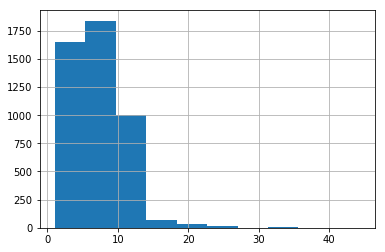

In [24]:
chipo['item_price_float'] = chipo['item_price'].str.extract('([^\$]+)').astype(float, expand=False)
%matplotlib inline
chipo['item_price_float'].hist()

### Step 14. How much was the revenue for the period in the dataset?

In [26]:
# chipo['order_price'] = chipo['item_price']*chipo['quantity']
#  量をかけた値じゃなくていいらしい。。。
chipo.item_price_float.sum()

34500.16000000046

### Step 15. How many orders were made in the period?

In [30]:
len(chipo.groupby('order_id'))

print(chipo.order_id.value_counts().count())

1834


### Step 16. What is the average amount per order?

In [41]:
chipo.groupby('order_id').sum().item_price_float.mean()

18.81142857142869

### Step 17. How many different items are sold?

In [56]:
_df = chipo.groupby(["item_name"]).
# _df[_df['quantity'] > 1]
_df
# chipo[chipo['order_id'] == 2]

quantity  choice_description  item_price  \
item_name         order_id                                             
6 Pack Soft Drink 129              1                   1           1   
                  148              1                   1           1   
                  154              1                   1           1   
                  168              1                   1           1   
                  182              1                   1           1   
                  230              1                   1           1   
                  264              1                   1           1   
                  298              1                   1           1   
                  306              1                   1           1   
                  363              1                   1           1   
                  422              1                   1           1   
                  432              1                   1           1   
                  465              1                   1           1   
                  481              1                   1           1   
                  511              1                   1           1   
                  520              1                   1           1   
                  566              1                   1           1   
                  708              1                   1           1   
                  709              1                   1           1   
                  749              1                   1           1   
                  754              1                   1           1   
                  774              1                   1           1   
                  776              1                   1           1   
                  784              1                   1           1   
                  798              1                   1           1   
                  849              1                   1           1   
                  899              1                   1           1   
                  945              1                   1           1   
                  949              1                   1           1   
                  1076             1                   1           1   
...                              ...                 ...         ...   
Veggie Salad      1094             1                   1           1   
                  1192             1                   1           1   
                  1263             1                   1           1   
                  1395             1                   1           1   
                  1635             1                   1           1   
Veggie Salad Bowl 83               1                   1           1   
                  128              1                   1           1   
                  195              1                   1           1   
                  207              1                   1           1   
                  394              1                   1           1   
                  536              1                   1           1   
                  760              1                   1           1   
                  869              1                   1           1   
                  896              1                   1           1   
                  913              1                   1           1   
                  1066             1                   1           1   
                  1289             1                   1           1   
                  1321             1                   1           1   
                  1646             1                   1           1   
                  1677             1                   1           1   
                  1700             1                   1           1   
                  1805             1                   1           1   
                  1818             1                   1           1